### **Name: Syed Umair Andrabi**

### **Reg. No: 22MCB0015**

Dataset link: https://hpi.de/en/naumann/projects/repeatability/datasets/dblp-dataset.html

In [ ]:
!pip install pandas xmltodict

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xmltodict

# **Preparing the data**

Parsing XML and converting to dataframe

In [ ]:
# Required Libraries
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('/content/drive/MyDrive/DATA SETS/bibliographic _data_cse.xml')

# Get the root element
root = tree.getroot()

# Initialize empty lists to store the data
mdates = [] # date of modification
authors = []
titles = []
journals = []
volumes = []
years = []

# Iterate through each 'article' in the XML
for article in root.findall('article'):
    mdates.append(article.get('mdate'))
    authors.append([a.text for a in article.findall('author')])
    titles.append(article.find('title').text if article.find('title') is not None else None)
    journals.append(article.find('journal').text if article.find('journal') is not None else None)
    volumes.append(article.find('volume').text if article.find('volume') is not None else None)
    years.append(article.find('year').text if article.find('year') is not None else None)

# Store the data in a pandas DataFrame
df = pd.DataFrame({
    'mdate': mdates,
    'authors': authors,
    'title': titles,
    'journal': journals,
    'volume': volumes,
    'year': years
})
df

,mdate,authors,title,journal,volume,year
0,2002-01-03,[Frank Manola],Distributed Object Management Technology.,GTE Laboratories Incorporated,TM-0014-06-88-165,1988
1,2003-01-31,"[Christoph Beierle, Udo Pletat]",The Algebra of Feature Graph Specifications,IWBS Report,94,1989
2,2003-01-31,[Ipke Wachsmuth],On Structuring Domain-Specific Knowledge,LILOG-Report,12,1987
3,2003-01-31,[Christopher Habel],Prozedurale Aspekte der Wegplanung und Wegbesc...,LILOG-Report,17,1987
4,2003-01-31,[Klaus Rehkämper],Mentale Bilder und Wegbedeutungen,LILOG-Report,20,1987
...,...,...,...,...,...,...
18177,2002-06-18,"[Michael N. Huhns, Vance T. Holderfield]",Robust Software.,IEEE Internet Computing,6,2002
18178,2002-01-03,"[Michael N. Huhns, José M. Vidal]",Agents on the Web: Online Auctions.,IEEE Internet Computing,3,1999
18179,2002-06-18,[David J. Farber],Balancing Security and Liberty.,IEEE Internet Computing,5,2001
18180,2002-06-18,"[Federico Bergenti, Agostino Poggi, Bernard Bu...",Deploying FIPA-Compliant Systems on Handheld D...,IEEE Internet Computing,5,2001


In [ ]:
df.describe()

,mdate,authors,title,journal,volume,year
count,18182,18182,18182,18182,18157,18182
unique,310,16500,17910,372,325,66
top,2002-01-03,[],Editorial.,Commun. ACM,6,2002
freq,4210,213,48,730,574,1480


### **Creating various sample sizes of the dataset**

Because original dataset is large, which will a lot of time to processes. So for experimental analysis we can use smaller samples

In [ ]:
df_20 = df[:20]
df_random_20 = df.sample(n=20)
df_200 = df[:200]
df_random_200 = df.sample(n=200)
df_1000 = df[:1000]
df_random_1000 = df.sample(n=1000)
df_5000 = df[:500]
df_random_5000 = df.sample(n=5000)

# **3a. Visualizing Bibliographic multidimensional network**

## **1. Visualize various relationships with the heterogenous network**

We will construct a multidimensional network (heterogeneous graph) with the following dimensions:

1. **Author Relationships:** Each author will be considered as a node, and
connections between authors will be established based on collaboration on the same article.
2. **Author-Article Relationships:** Links between authors and the articles they've written.
3. **Article-Journal Relationships:** Links between articles and the journals in which they were published.

In [ ]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for each dimension
for _, row in df_random_20.iterrows():
    authors = row['authors']
    title = row['title']
    journal = row['journal']

    # Add nodes and edges for author relationships
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Add an edge between every pair of authors who collaborated on the same article
            G.add_edge(authors[i], authors[j], relationship="collaborated")

    # Add nodes and edges for author-article relationships
    for author in authors:
        G.add_edge(author, title, relationship="wrote")

    # Add nodes and edges for article-journal relationships
    G.add_edge(title, journal, relationship="published_in")
print(G)

DiGraph with 83 nodes and 110 edges


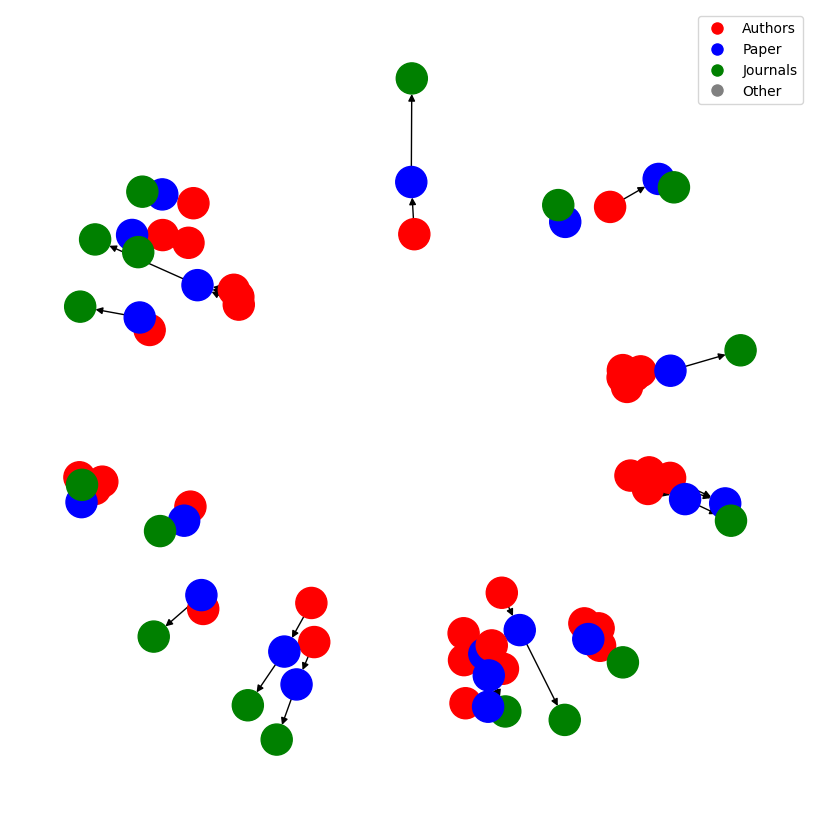

In [ ]:
# Create sets for faster membership testing
author_set = set([item for sublist in df_random_20['authors'].tolist() for item in sublist])
title_set = set(df_random_20['title'].tolist())
journal_set = set(df_random_20['journal'].tolist())

colors = []
for node in G:
    if node in author_set:
        colors.append('red')
    elif node in title_set:
        colors.append('blue')
    elif node in journal_set:
        colors.append('green')
    else:
        colors.append('gray')

# Visualization
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_color=colors, node_size=500)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Authors', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Paper', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Journals', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='gray', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.show()


**This multidimensional graph very clearly helps to visualize that multiple authors working on a paper and publishing to a journal**

### **Now lets try with bigger sample dataset to see which journal is more common.**

In [ ]:
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for each dimension
for _, row in df_random_1000.iterrows():
    authors = row['authors']
    title = row['title']
    journal = row['journal']

    # Add nodes and edges for author relationships
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # Add an edge between every pair of authors who collaborated on the same article
            G.add_edge(authors[i], authors[j], relationship="collaborated")

    # Add nodes and edges for author-article relationships
    for author in authors:
        G.add_edge(author, title, relationship="wrote")

    # Add nodes and edges for article-journal relationships
    G.add_edge(title, journal, relationship="published_in")

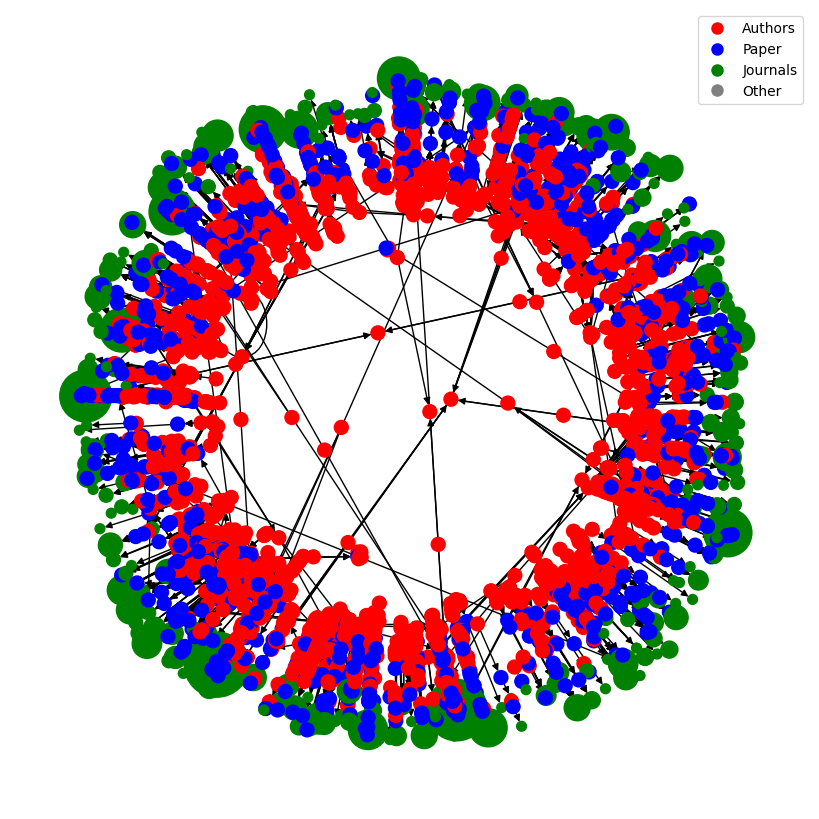

In [ ]:
# Create sets for faster membership testing
author_set = set([item for sublist in df_random_1000['authors'].tolist() for item in sublist])
title_set = set(df_random_1000['title'].tolist())
journal_set = set(df_random_1000['journal'].tolist())

# Compute the degrees of the nodes only for journal nodes
degree_dict = dict(G.degree(journal_set))
degrees = [degree_dict.get(node, 0)*50 if node in journal_set else 100 for node in G.nodes()]

# Use different colors for authors, papers, and journals
color_map = []
for node in G:
    if node in author_set:
        color_map.append('red')
    elif node in title_set:
        color_map.append('blue')
    elif node in journal_set:
        color_map.append('green')
    else:
        color_map.append('gray')

# Visualization
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_color=color_map, node_size=degrees)

# Create legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Authors', markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Paper', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Journals', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Other', markerfacecolor='gray', markersize=10)
]

plt.legend(handles=legend_elements, loc='upper right')
plt.show()


We can see prominent journals have larger size

## **2. Visualize the co-authorship network**


In [ ]:
# !pip install python-louvain

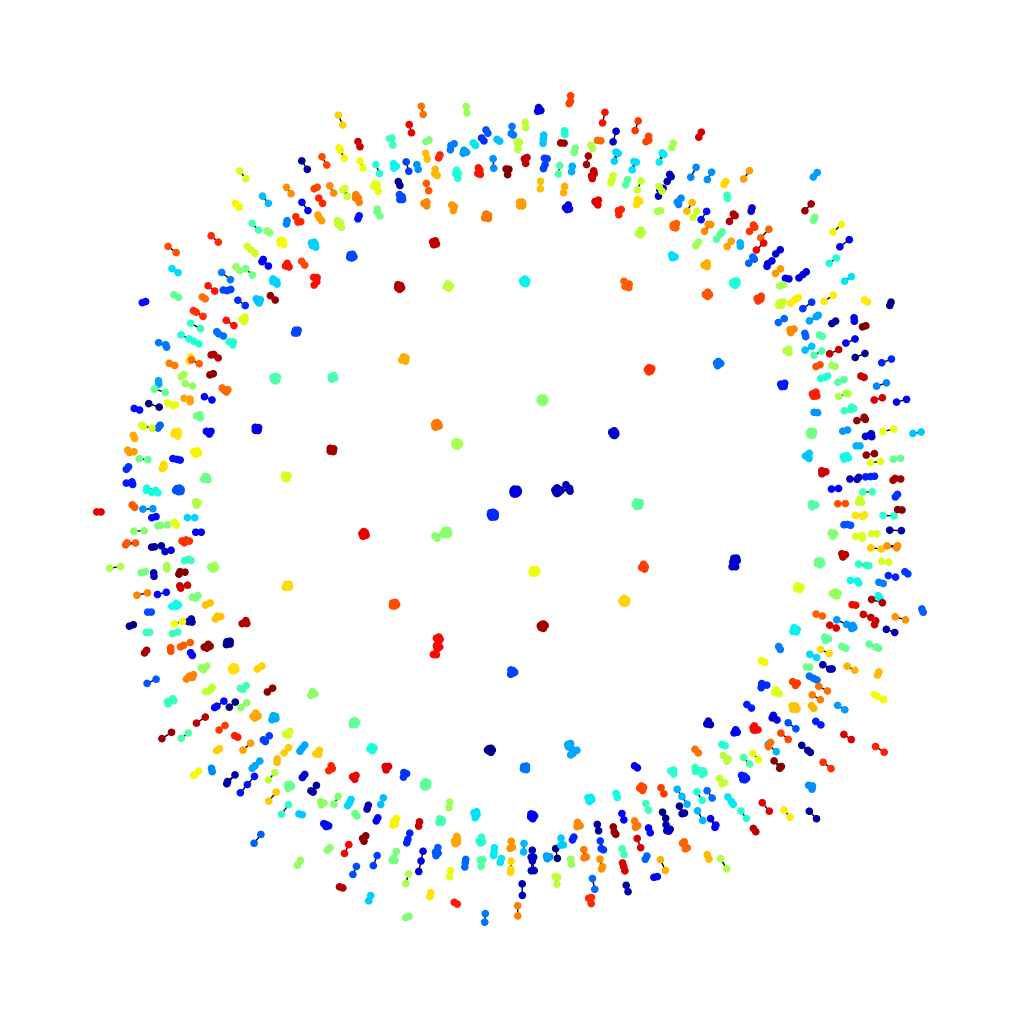

In [ ]:
# Import required libraries
from community import community_louvain

# Create a new undirected graph for the co-authorship network
G_coauthor = nx.Graph()

# Add edges for each pair of authors who collaborated on the same article
for authors in df_random_1000['authors']:
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            # If the edge already exists, increment the weight by one
            if G_coauthor.has_edge(authors[i], authors[j]):
                G_coauthor[authors[i]][authors[j]]['weight'] += 1
            # Else, create a new edge with weight one
            else:
                G_coauthor.add_edge(authors[i], authors[j], weight=1)

# Use the Louvain method to detect communities
partition = community_louvain.best_partition(G_coauthor)

# Create a color map for the communities
community_colors = [partition[node] for node in G_coauthor]

# Visualization
plt.figure(figsize=(10, 10))
nx.draw(G_coauthor, with_labels=False, node_color=community_colors, node_size=20, cmap=plt.cm.jet)
plt.show()


We create a co-authorship network where nodes represent authors and edges represent collaborations between authors. The weight of an edge corresponds to the number of collaborations between two authors.

## **Some more visualization**

**Visualizing the number of papers published per year:**

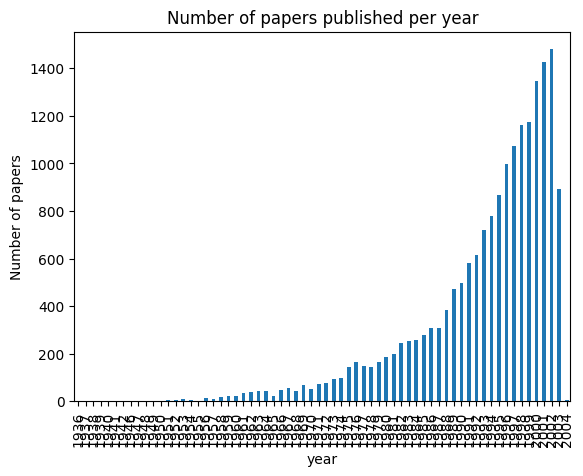

In [ ]:
df.groupby('year').size().plot(kind='bar')
plt.title('Number of papers published per year')
plt.ylabel('Number of papers')
plt.show()


**Visualizing the number of unique authors publishing per year:**

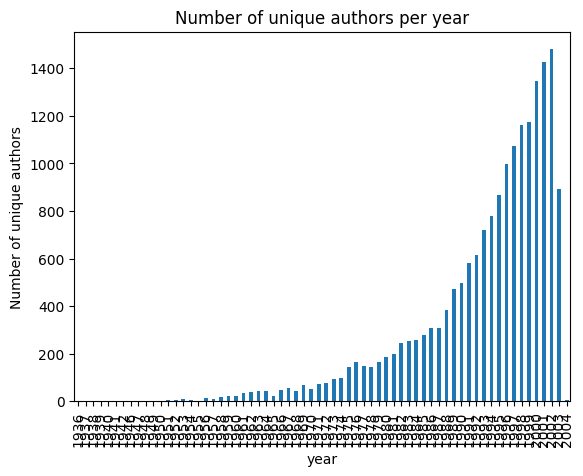

In [ ]:
df['unique_authors'] = df['authors'].apply(set)
df.groupby('year')['unique_authors'].apply(len).plot(kind='bar')
plt.title('Number of unique authors per year')
plt.ylabel('Number of unique authors')
plt.show()

# **3b. Classification and Clustering**

### **Topic Clusters:** clustering the papers based on their titles

 We would first preprocess the titles to remove any punctuation, convert to lower case, remove stop words, and apply stemming/lemmatization. Then, we would convert these preprocessed titles into a numerical format using TF-IDF. Finally, we'd apply a clustering algorithm like K-Means to find groups of similar papers.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocess titles
def preprocess_title(title):
    words = word_tokenize(title.lower())
    words = [stemmer.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df_copy = df_random_200.copy();

df_copy['title_preprocessed'] = df_copy['title'].apply(preprocess_title)
df_copy['title_preprocessed']

7257           interpret code gener base intermedi languag
11327      open hypermedia approach integr structur servic
18048    experiment studi algorithm weight complet time...
1931          control overhead perform metric evalu design
10314         block transit free choic net tell throughput
                               ...                        
15928                       digit divid web impact journal
14576    applic autom structur analysi organ compound u...
5018                         recognit algorithm interv dag
3393                       distanc distribut bch code dual
17401                       give best implement natur join
Name: title_preprocessed, Length: 200, dtype: object

In [ ]:
# Convert titles into numerical format using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_copy['title_preprocessed'])
print(X)

  (0, 318)	0.32744615686538103
  (0, 299)	0.4703794886693312
  (0, 43)	0.39355377594136787
  (0, 249)	0.3541466723382591
  (0, 101)	0.4122630805037951
  (0, 303)	0.4703794886693312
  (1, 542)	0.3704826428008762
  (1, 573)	0.3704826428008762
  (1, 294)	0.44280463493126593
  (1, 21)	0.3704826428008762
  (1, 276)	0.44280463493126593
  (1, 416)	0.44280463493126593
  (2, 529)	0.4334108933796816
  (2, 610)	0.37986203551111464
  (2, 113)	0.4020868195701229
  (2, 662)	0.4020868195701229
  (2, 13)	0.2636650300234304
  (2, 575)	0.3366291015403641
  (2, 213)	0.4020868195701229
  (3, 164)	0.3376138472379381
  (3, 207)	0.35827764924966904
  (3, 368)	0.4279449395511809
  (3, 445)	0.3859433735279964
  (3, 427)	0.4612834580513889
  (3, 129)	0.4612834580513889
  :	:
  (195, 171)	0.40737099422983053
  (196, 596)	0.31023527687059627
  (196, 439)	0.31023527687059627
  (196, 440)	0.31023527687059627
  (196, 116)	0.28781352222745604
  (196, 423)	0.2719050341362362
  (196, 35)	0.5756270444549121
  (196, 641)

In [ ]:
# Apply K-Means clustering
n_clusters = 5  # Change this to the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)

# Add cluster labels to dataframe
df_copy['cluster_label'] = kmeans.labels_

print(f'Silhouette Score: {silhouette_score(X, kmeans.labels_)}')

Silhouette Score: 0.012018196065498697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print out titles from each cluster
for i in range(n_clusters):
    print(f'Cluster {i} Titles:')
    print(df_copy[df_copy['cluster_label'] == i]['title'].head())
    print('\n')


Cluster 0 Titles:
6436     The phase transition in random horn satisfiabi...
15257    Rowbottom Cardinals and Jonsson Cardinals are ...
14919    On Automating Diagrammatic Proofs of Arithmeti...
5403      Graph Decompositions and Secret Sharing Schemes.
3187     Approximate protein folding in the HP side cha...
Name: title, dtype: object


Cluster 1 Titles:
838       From the Chairman.
15531    Chairman's Message.
Name: title, dtype: object


Cluster 2 Titles:
7208     The Cambridge Multiple-Access System in Retros...
1676     Performance Evaluation of Distributed Diagnosi...
9505          Structural Analysis of Signal-Event Systems.
17206    On the Estimation of Mixing Coefficients for a...
10911    Synthesis of Time-Optimal Systolic Arrays with...
Name: title, dtype: object


Cluster 3 Titles:
3890     Collaborative multimedia development teams in ...
7399     Bericht über die 8th European Software Enginee...
15627    Evaluating modeling efficiency of a specific s...
5620     The ref

Reducing dimensions for visualization purpose

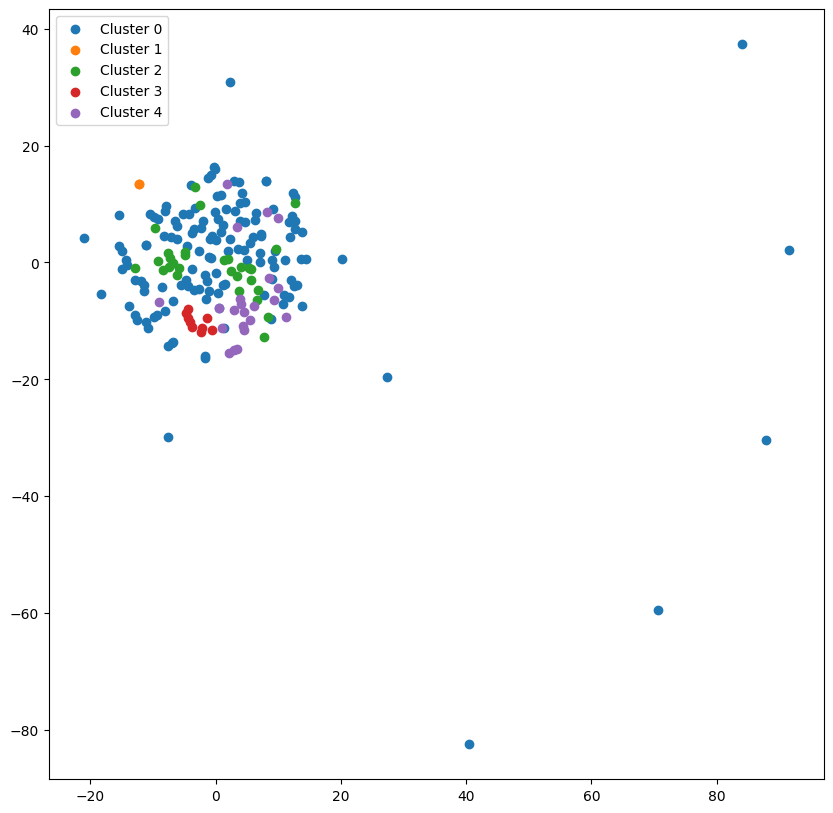

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, init='random', random_state=42)
X_2d = tsne.fit_transform(X)


# Create a scatter plot of the t-SNE output, coloring each point by its cluster assignment
plt.figure(figsize=(10, 10))
for i in range(n_clusters):
    plt.scatter(X_2d[kmeans.labels_ == i, 0], X_2d[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.legend()
plt.show()


### **Journal Clusters:** cluster journals based on the types of articles they publish.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
# Combine all paper titles for each journal into a single string
df_copy_2 = df_random_1000.copy()
df_copy_2['title'] = df_copy_2['title'].apply(lambda x: x.lower())  # convert to lowercase
grouped = df_copy_2.groupby('journal')['title'].apply(' '.join).reset_index()

In [ ]:
# Vectorize the text
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(grouped['title'])

In [ ]:
# Run KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign the cluster labels
grouped['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Print out titles from each cluster
n_clusters = 5
for i in range(n_clusters):
    print(f'Cluster {i} Journals:')
    print(grouped[grouped['cluster'] == i]['journal'].head())
    print('\n')

Cluster 0 Journals:
0                         ACM Comput. Surv.
1                 ACM SIGMOD Digital Review
2                  ACM Trans. Comput. Syst.
3                 ACM Trans. Database Syst.
4    ACM Trans. Design Autom. Electr. Syst.
Name: journal, dtype: object


Cluster 1 Journals:
45                                     Computer Networks
103                                IEEE Trans. Computers
107                            IEEE Trans. Software Eng.
112    IEEE Transactions on Pattern Analysis and Mach...
120                                  Inf. Process. Lett.
Name: journal, dtype: object


Cluster 2 Journals:
154    J. Symb. Log.
Name: journal, dtype: object


Cluster 3 Journals:
35    Commun. ACM
Name: journal, dtype: object


Cluster 4 Journals:
165    Journal of Chemical Information and Computer S...
Name: journal, dtype: object




In [ ]:
grouped.head()

,journal,title,cluster
0,ACM Comput. Surv.,human-computer interaction: input devices. an ...,0
1,ACM SIGMOD Digital Review,review - relational databases for querying xml...,0
2,ACM Trans. Comput. Syst.,801 storage: architecture and programming. mea...,0
3,ACM Trans. Database Syst.,physical database design for relational databa...,0
4,ACM Trans. Design Autom. Electr. Syst.,algorithms to compute bridging fault coverage of,0


### **1. Classification**

Now, you can use a classification model to predict the research interests of a new author. Train the model using the feature vectors of the authors as inputs, and their cluster labels as targets.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [ ]:
# Create a new DataFrame where each row is an author-paper pair
df_copy_3 = df_1000.copy()
df_flattened = df_copy_3.explode('authors')

# Combine all titles for each author
df_flattened['title_combined'] = df_flattened.groupby('authors')['title'].transform(lambda x: ' '.join(x))

In [ ]:
# Remove duplicates
df_flattened = df_flattened[['authors', 'title_combined']].drop_duplicates()

# Fill missing values with an empty string
df_flattened['title_combined'].fillna("", inplace=True)

In [ ]:
# Define the number of clusters
n_clusters = 5

# Create a pipeline that transforms the data using TF-IDF and then performs k-means clustering
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
])

# Assign each author to a cluster
df_flattened['cluster_label'] = pipeline.fit_predict(df_flattened['title_combined'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


To classify a new author, you would combine all their paper titles into a single string, and then call pipeline.predict() with that string.

In [ ]:
new_author_titles = 'Deep Learning-Based Object Recognition in Real-Time Systems. A Comparative Study of Machine Learning Algorithms for Sentiment Analysis Natural Language Processing Techniques for Text Summarization'
new_author_cluster = pipeline.predict([new_author_titles])[0]

print(f'New author belongs to cluster {new_author_cluster}.')


New author belongs to cluster 2.
